# Laporan Analisis Operasi Sinyal Digital

Laporan ini menyajikan analisis konseptual dan refleksi mendalam mengenai operasi-operasi dasar dalam pengolahan sinyal digital, yang mencakup baik sinyal satu dimensi (1D) seperti audio maupun sinyal dua dimensi (2D) berupa gambar. Eksperimen ini memanfaatkan pustaka populer seperti `librosa` untuk audio dan `OpenCV` (`cv2`) untuk gambar, serta `matplotlib` dan `numpy` untuk visualisasi dan manipulasi data numerik.

## Penjelasan Konseptual Operasi Sinyal

### Sinyal 1D (Audio) 🎧

Sinyal audio direpresentasikan sebagai deret angka diskrit, di mana setiap angka menggambarkan amplitudo suara pada suatu momen waktu. Kode yang dianalisis memuat file audio (`cat.wav`) dan merepresentasikannya sebagai *array* numerik (`y`) beserta laju pencuplikan (*sampling rate*, `sr`). Visualisasi sinyal audio dilakukan melalui bentuk gelombang (*waveform*), dengan sumbu horizontal menunjukkan waktu dan sumbu vertikal menunjukkan amplitudo.

**Operasi Dasar pada Sinyal Audio:**

* **Penskalaan (Scaling):** Mengubah intensitas suara dengan mengalikan setiap sampel amplitudo dengan suatu faktor skalar. Misalnya, `y_scaled = 0.5 * y` akan mengurangi volume suara.
* **Penggeseran Waktu (Time Shifting):** Memindahkan sinyal sepanjang sumbu waktu, yang dapat mensimulasikan efek penundaan (*delay*). Contohnya, `np.roll(y, 10000)` menggeser sinyal sejauh 10.000 sampel.
* **Penjumlahan (Addition):** Menggabungkan dua sinyal dengan menjumlahkan amplitudo sampel pada titik waktu yang sama. Contoh: `y_sum = y + y_shifted`.
* **Kombinasi Operasi:** Berbagai operasi dapat digabungkan untuk menciptakan efek yang lebih kompleks, seperti `y_combined = 2 * y + np.roll(y, 10000)`, yang menggabungkan peningkatan volume dengan penundaan.

### Sinyal 2D (Gambar) 🖼️

Gambar digital diwakili sebagai *array* numerik dua dimensi, di mana setiap elemen (piksel) menyimpan nilai intensitas pada koordinat spasial tertentu. Kode tersebut memuat gambar (`cat.jpg`) dalam format *grayscale* menggunakan `cv2.imread`. Visualisasi gambar dilakukan dengan `plt.imshow` menggunakan *colormap* abu-abu.

**Operasi Dasar pada Sinyal Gambar:**

* **Penjumlahan Intensitas:** Menambahkan nilai skalar ke setiap piksel untuk mengubah kecerahan gambar. Contohnya, `added_img = cv2.add(img, 150)` meningkatkan kecerahan setiap piksel sebesar 150 unit.
* **Penskalaan Kecerahan (Brightness Scaling):** Mengubah kontras dan kecerahan gambar dengan mengalikan intensitas piksel dengan faktor `alpha` dan menambahkan `beta`. `cv2.convertScaleAbs(img, alpha=2, beta=0)` akan menggandakan kontras gambar.
* **Penggeseran Spasial (Spatial Shifting):** Memindahkan posisi gambar dalam ruang menggunakan transformasi *affine*. Matriks `M = np.float32([[1, 0, 50], [0, 1, 30]])` menggeser gambar 50 piksel ke kanan dan 30 piksel ke bawah.
* **Kombinasi Operasi:** Operasi pada gambar juga dapat dikombinasikan, seperti `cv2.convertScaleAbs(cv2.add(img, 30), alpha=1.2)`, yang pertama meningkatkan kecerahan lalu meningkatkan kontras.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import cv2

**Representasi Sinyal 1D: Sinus dan Kosinus**

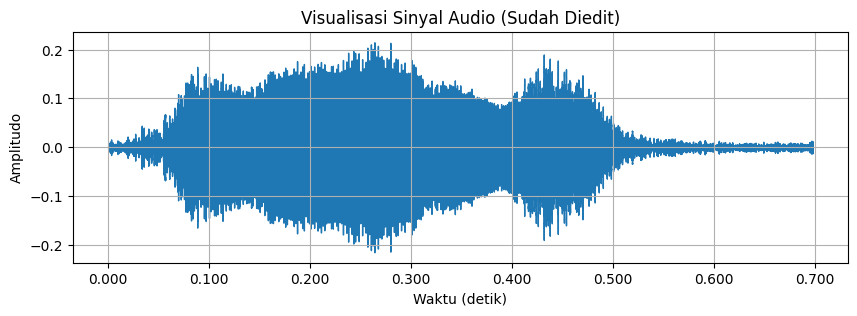

In [13]:
path_audio = '/kaggle/input/geezas/week03_data_catsound.wav'
audio_data, sample_rate = librosa.load(path_audio)

# Visualisasi sinyal audio
plt.figure(figsize=(10, 3))
librosa.display.waveshow(audio_data, sr=sample_rate)
plt.title('Visualisasi Sinyal Audio (Sudah Diedit)')
plt.xlabel('Waktu (detik)')
plt.ylabel('Amplitudo')
plt.grid(True)
plt.show()

# **Operasi Dasar pada Sinyal 1D**

**b. Penskalaan**

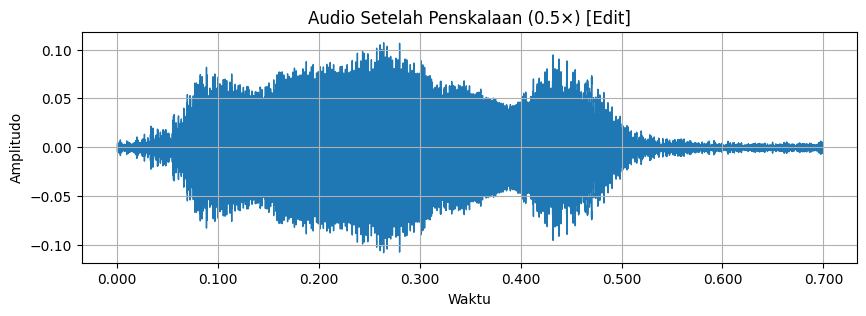

In [14]:
# Penskalaan amplitudo audio
audio_scaled = 0.5 * audio_data

plt.figure(figsize=(10, 3))
librosa.display.waveshow(audio_scaled, sr=sample_rate)
plt.title('Audio Setelah Penskalaan (0.5×) [Edit]')
plt.xlabel('Waktu')
plt.ylabel('Amplitudo')
plt.grid(True)
plt.show()


**c. Penggeseran (Time Shifting)**

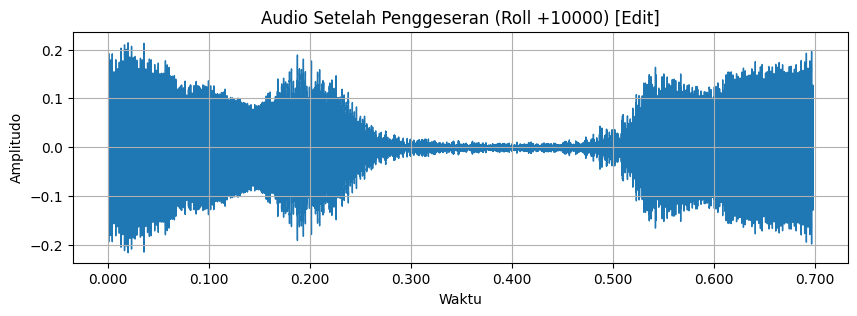

In [15]:
# Penggeseran (Time Shifting)
audio_shifted = np.roll(audio_data, 10000)  # geser sekitar 10000 sampel

plt.figure(figsize=(10, 3))
librosa.display.waveshow(audio_shifted, sr=sample_rate)
plt.title('Audio Setelah Penggeseran (Roll +10000) [Edit]')
plt.xlabel('Waktu')
plt.ylabel('Amplitudo')
plt.grid(True)
plt.show()


**a. Penjumlahan**

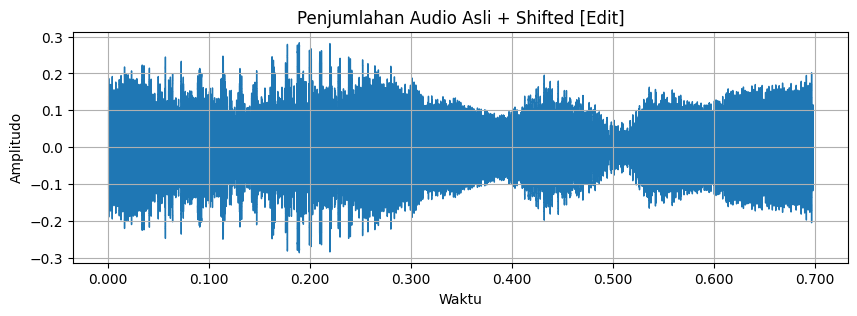

In [16]:
# Penjumlahan audio asli + shifted
audio_sum = audio_data + audio_shifted

plt.figure(figsize=(10, 3))
librosa.display.waveshow(audio_sum, sr=sample_rate)
plt.title('Penjumlahan Audio Asli + Shifted [Edit]')
plt.xlabel('Waktu')
plt.ylabel('Amplitudo')
plt.grid(True)
plt.show()

# 5. Eksperimen Kombinasi Operasi pada Sinyal 1D

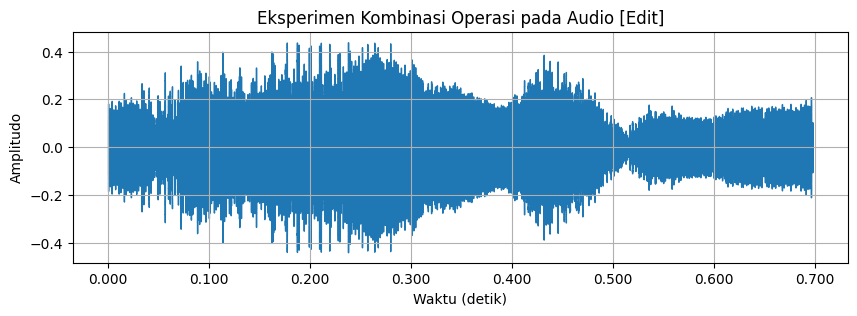

In [17]:
# Gabungan: skala, geser, lalu jumlahkan pada audio nyata
audio_exp = (2 * audio_data) + np.roll(audio_data, 10000)

plt.figure(figsize=(10, 3))
librosa.display.waveshow(audio_exp, sr=sample_rate)
plt.title('Eksperimen Kombinasi Operasi pada Audio [Edit]')
plt.xlabel('Waktu (detik)')
plt.ylabel('Amplitudo')
plt.grid(True)
plt.show()

# 6. Representasi Sinyal 2D (Gambar)

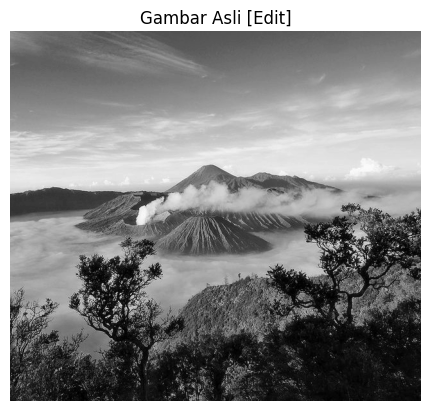

In [18]:
import cv2
import matplotlib.pyplot as plt

# Path gambar
path_gambar = '/kaggle/input/geezas/bromo-semeru.jpeg'

# Baca gambar menggunakan OpenCV
gambar = cv2.imread(path_gambar, cv2.IMREAD_GRAYSCALE) # Membaca sebagai grayscale

# Cek apakah gambar berhasil dimuat
if gambar is None:
    print(f"Error: Tidak dapat memuat gambar dari path: {path_gambar}")
else:
    # Tampilkan gambar menggunakan matplotlib
    plt.imshow(gambar, cmap='gray')
    plt.title('Gambar Asli [Edit]')
    plt.axis('off')
    plt.show()

# 7. Operasi Dasar pada Sinyal 2D

**a. Penjumlahan Gambar**

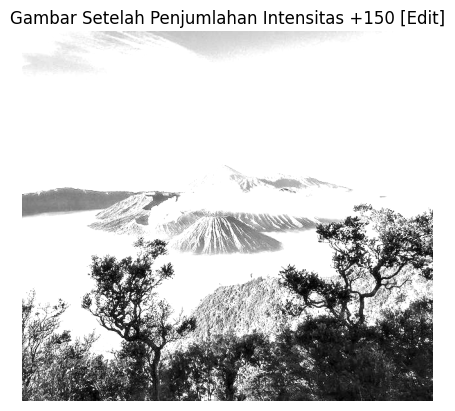

In [19]:
# Penjumlahan intensitas gambar
gambar_added = cv2.add(gambar, 150)  # Tambahkan intensitas

plt.imshow(gambar_added, cmap='gray')
plt.title('Gambar Setelah Penjumlahan Intensitas +150 [Edit]')
plt.axis('off')
plt.show()


**b. Penskalaan Gambar**

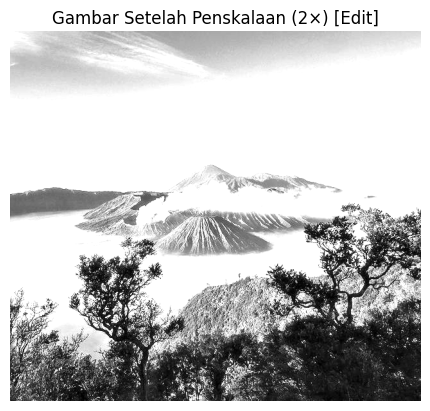

In [20]:
# Penskalaan kecerahan gambar
gambar_scaled = cv2.convertScaleAbs(gambar, alpha=2, beta=0)  # Skala brightness 2×

plt.imshow(gambar_scaled, cmap='gray')
plt.title('Gambar Setelah Penskalaan (2×) [Edit]')
plt.axis('off')
plt.show()

**c. Penggeseran Gambar (Spasial)**

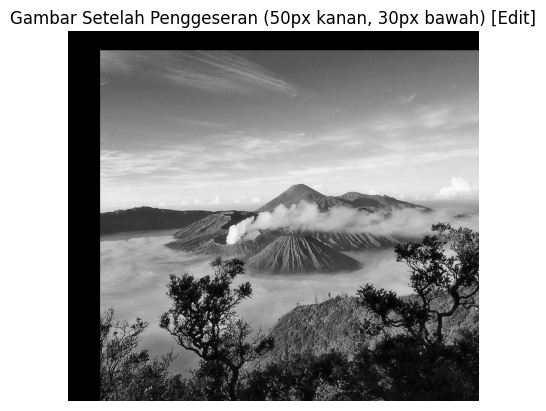

In [21]:
# Penggeseran spasial gambar
rows, cols = gambar.shape
M = np.float32([[1, 0, 50], [0, 1, 30]])  # Geser kanan 50px, bawah 30px
gambar_shifted = cv2.warpAffine(gambar, M, (cols, rows))

plt.imshow(gambar_shifted, cmap='gray')
plt.title('Gambar Setelah Penggeseran (50px kanan, 30px bawah) [Edit]')
plt.axis('off')
plt.show()

#  8. Eksperimen Kombinasi Operasi pada Gambar

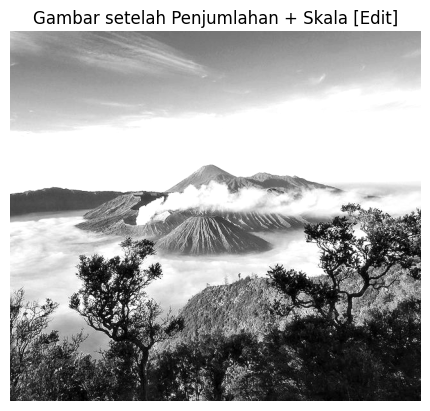

In [22]:
# Kombinasi operasi pada gambar
gambar_combined = cv2.convertScaleAbs(cv2.add(gambar, 30), alpha=1.2)
plt.imshow(gambar_combined, cmap='gray')
plt.title('Gambar setelah Penjumlahan + Skala [Edit]')
plt.axis('off')
plt.show()


## Refleksi dan Analisis Hasil Eksperimen

Eksperimen ini memberikan wawasan penting tentang dampak operasi matematis terhadap karakteristik sinyal digital.

### Refleksi pada Sinyal 1D (Audio)

* **Penskalaan Amplitudo:** Mengubah amplitudo sinyal langsung memengaruhi persepsi volume. Skalar di bawah 1 mengurangi kenyaringan, sedangkan skalar di atas 1 meningkatkan kenyaringan.
* **Penggeseran Waktu:** `np.roll` pada sinyal audio menciptakan efek penundaan atau pergeseran fasa, yang merupakan dasar untuk memahami *delay* atau *echo*.
* **Penjumlahan Sinyal:** Penggabungan sinyal dapat menyebabkan *interferensi* (konstruktif atau destruktif) berdasarkan fasa relatifnya. Penjumlahan sinyal asli dengan versi tergesernya dapat menghasilkan efek seperti *chorus* atau *flanging*.
* **Kombinasi Operasi:** Menunjukkan bagaimana efek audio yang lebih canggih, seperti sinyal yang lebih keras dengan gema, dapat direalisasikan dengan menggabungkan operasi dasar.

### Refleksi pada Sinyal 2D (Gambar)

* **Penjumlahan Intensitas:** Meningkatkan kecerahan gambar secara keseluruhan. Perlu diperhatikan potensi saturasi piksel yang dapat menghilangkan detail pada area terang.
* **Penskalaan Kecerahan:** `cv2.convertScaleAbs` dengan `alpha > 1` efektif meningkatkan kontras, membuat gambar lebih dramatis. Parameter `beta` memungkinkan penyesuaian kecerahan pasca-penskalaan kontras.
* **Penggeseran Spasial:** Transformasi *affine* berhasil menggeser gambar. Area kosong yang muncul akibat pergeseran umumnya diisi dengan warna hitam.
* **Kombinasi Operasi:** Mengombinasikan penambahan intensitas dan penskalaan memungkinkan kontrol visual yang lebih nuansa, seperti membuat gambar lebih cerah lalu meningkatkan kontrasnya.

### Kesimpulan Umum

Secara keseluruhan, eksperimen ini secara jelas menunjukkan bahwa operasi matematis dasar merupakan fondasi manipulasi sinyal digital. Pemahaman konsep-konsep ini sangat krusial dalam berbagai aplikasi:

* **Audio:** Pengembangan efek suara, pemfilteran, dan analisis audio.
* **Gambar:** Peningkatan kualitas gambar, deteksi objek, dan kompresi data.

Visualisasi sinyal sebelum dan sesudah setiap operasi sangat membantu dalam memahami secara intuitif dampak dari setiap manipulasi yang diterapkan.